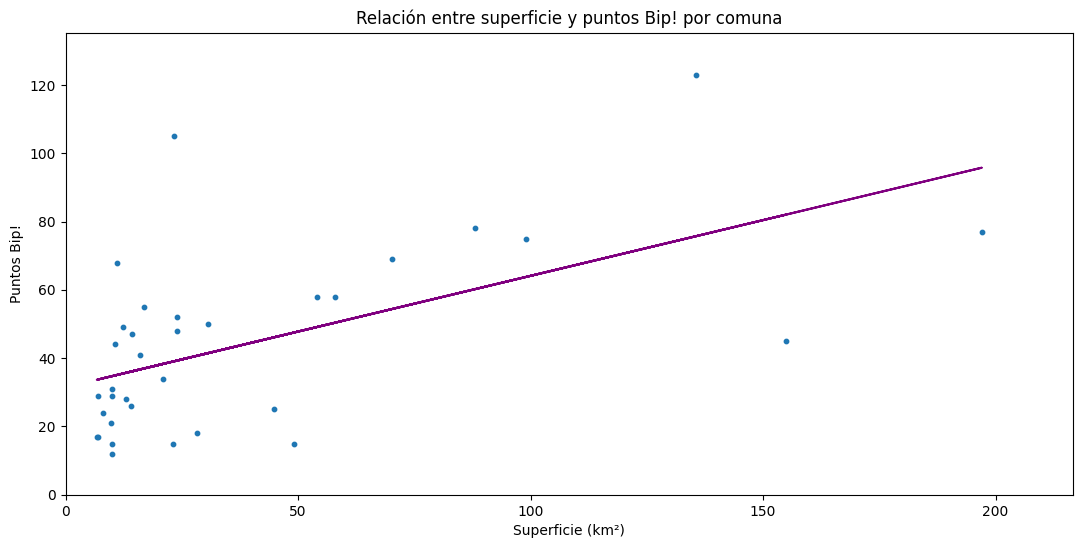

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bip = pd.read_csv("cargas_bip.csv")
bip_comuna = bip['COMUNA'].value_counts().to_dict() #valores de puntos bip de cada comuna
#print(bip_comuna) #descomentar para ver la cantidad de puntos bip! en cada comuna

superficie = pd.read_csv("superficie.csv") #csv con datos de superficie por comuna
superficie.columns = superficie.columns.str.strip() #strip elimina espacios al inicio o final
superficies = superficie.set_index("NOMBRE")["SUPERFICIE"].to_dict() #valores de áreas de cada comuna en km2
#print(superficies) #descomentar para ver la superficie en km2 de cada comuna

informacion = [(comuna, bip_comuna[comuna], superficies[comuna]) for comuna in bip_comuna.keys()]
    
df = pd.DataFrame(informacion, columns=["Comuna", "Puntos_Bip", "Superficie"])

#regresión lineal
n = len(df)
X = df["Superficie"].values
Y = df["Puntos_Bip"].values

def regr_lineal(vx, vy):
    sx = np.sum(vx)
    sy = np.sum(vy)
    sxy = np.sum(vx * vy)
    sx2 = np.sum(vx**2)
    
    a = (n * sxy - sx * sy) / (n * sx2 - sx**2)
    b = (sy - a * sx) / n
    
    return a, b

a, b = regr_lineal(X, Y)

#gráfico
plt.figure(figsize=(13, 6))
plt.scatter(X, Y, s=10)
plt.plot(X, a*X + b, color="purple", label="Regresión Lineal")

plt.title("Relación entre superficie y puntos Bip! por comuna")
plt.xlabel("Superficie (km²)")
plt.ylabel("Puntos Bip!")
plt.xticks(range(0, 250, 50))
plt.yticks(range(0, 140, 20))
plt.xlim(0, max(X) * 1.1)
plt.ylim(0, max(Y) * 1.1)

#plt.legend()
plt.show()


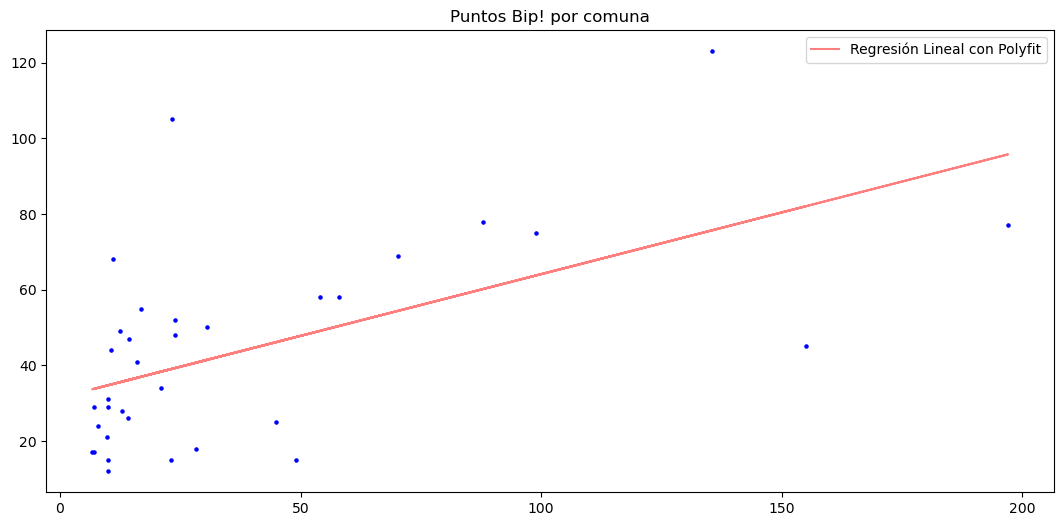

In [3]:
#cálculo y gráfico de la regresión lineal con la librería numpy utilizando polyfit

import numpy as np
from numpy import random 
import matplotlib.pyplot as plt

x = df["Superficie"]
y = df["Puntos_Bip"]

fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept 

fig = plt.figure(figsize = (13,6))
ax = fig.subplots()
plt.xticks(range(0, 250, 50))
plt.yticks(range(0, 140, 20))
ax.plot(x, fit_eq,color = "r", alpha = 0.5, label = "Regresión Lineal con Polyfit")
ax.scatter(x,y,s = 5, color = "b")
ax.set_title('Puntos Bip! por comuna')
ax.legend()
plt.show()

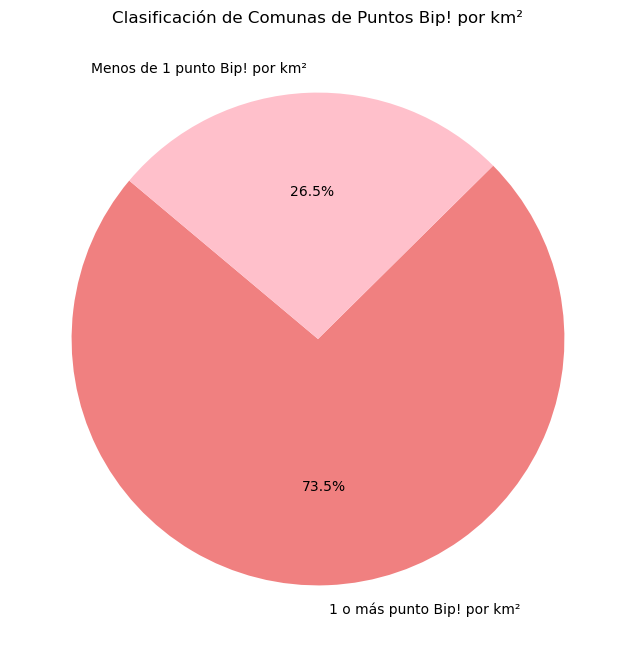

In [6]:
#se genera un diccionario para almacenar el promedio de puntos bip por km2 en cada comuna
promedios = {}

for comuna in bip_comuna.keys():
    puntos_bip = bip_comuna[comuna]
    superficie_km2 = superficies[comuna]
    
    if superficie_km2 != 0:
        promedio = round(puntos_bip / superficie_km2, 1)
        promedios[comuna] = promedio
        
bip_1 = [comuna for comuna, promedio in promedios.items() if promedio >= 1] 
bip_0 = [comuna for comuna, promedio in promedios.items() if promedio < 1]

#print(promedios) #descomentar para ver el promedio de puntos bip! por km2 en cada comuna

colors = ["lightcoral", "pink"]
plt.figure(figsize=(8, 8))
plt.pie([len(bip_1), len(bip_0)],
        labels=["1 o más punto Bip! por km²", "Menos de 1 punto Bip! por km²"],
        autopct='%1.1f%%',
        startangle=140, colors=colors)

plt.title("Clasificación de Comunas de Puntos Bip! por km²")

plt.show()

In [9]:
import simplekml
from polycircles import polycircles 
import pandas as pd


longitud = bip["LONGITUD"]
latitud = bip["LATITUD"]
comunas = bip["COMUNA"]

localizaciones = pd.DataFrame({
    "Comunas": comunas,
    "Longitudes": longitud,
    "Latitudes": latitud
})

points_kml = simplekml.Kml()
for index, row in localizaciones.iterrows():
    points_kml.newpoint(name=row["Comunas"], coords=[(row["Longitudes"], row["Latitudes"])])

points_kml_path = "/Users/jesuu/Desktop/points_kml.kml"
points_kml.save(points_kml_path)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jesuu/Desktop/points_kml.kml'